**<li>Section 1: COVID19 dataset & Libraries</l1>**
<li>Importing all the relevant libraries and “Covid19_Confirmed_dataset.csv” dataset as a Data Frame.</li>
<li>Pre-processing the Data Frame and dropping ‘Lat’ & ‘Long’ columns. Grouping the data with ‘Country/Region ‘using sum as an aggregate function.</li>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
corona_dataset = pd.read_csv('./../dataset/Covid19_Confirmed_dataset.csv')

In [4]:
corona_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
corona_dataset.shape

(266, 104)

In [6]:
corona_dataset.drop(['Lat','Long'],axis=1,inplace=True)

In [7]:
corona_countrywise = corona_dataset.groupby('Country/Region').sum()

In [8]:
corona_countrywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


####  Visualizing the pre-processed data for India, China & US countries

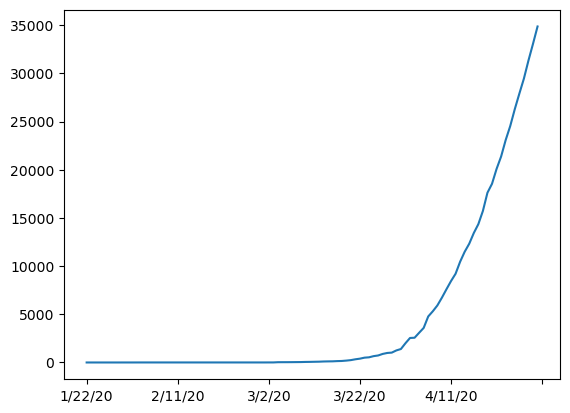

In [9]:
corona_countrywise.loc['India'].plot();

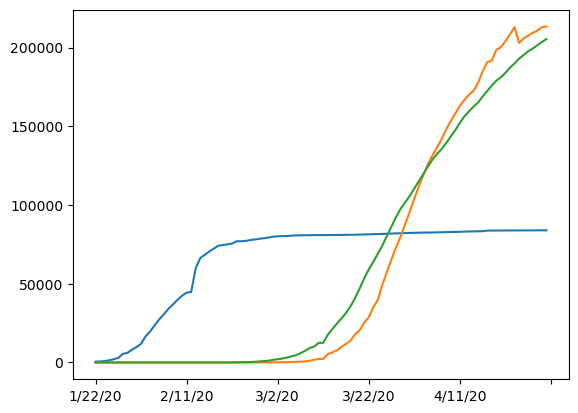

In [10]:
corona_countrywise.loc['China'].plot();
corona_countrywise.loc['Spain'].plot();
corona_countrywise.loc['Italy'].plot();

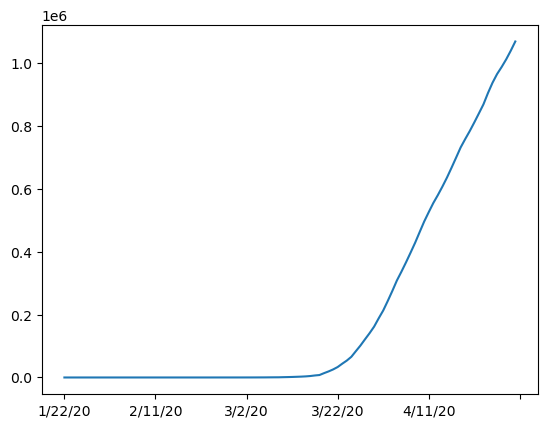

In [11]:
corona_countrywise.loc['US'].plot();


**<li>Section 2: Finding a good Measure</l1>**
<li>Calculating the maximum infection rate for India, China & US.</li>

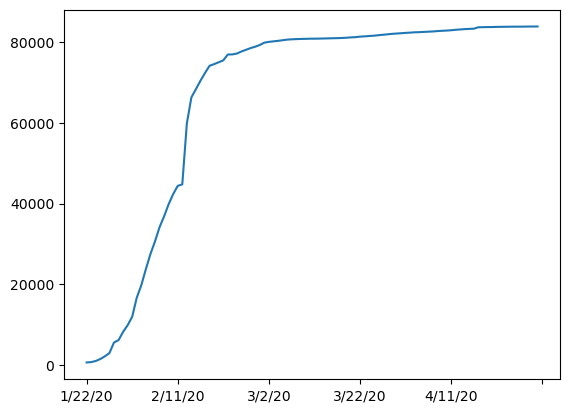

In [12]:
corona_countrywise.loc['China'].plot();

<AxesSubplot:>

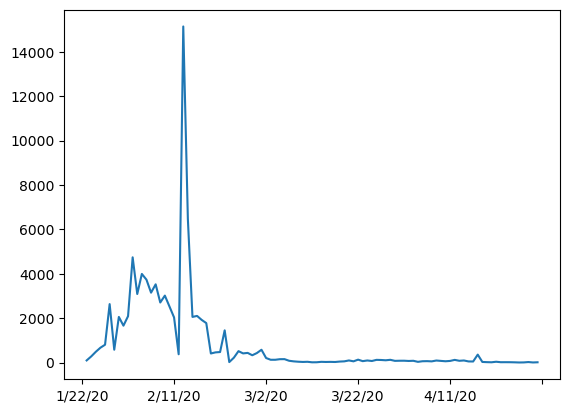

In [13]:
corona_countrywise.loc['China'].diff().plot()

In [14]:
corona_countrywise.loc['China'].diff().max()

15136.0

<AxesSubplot:>

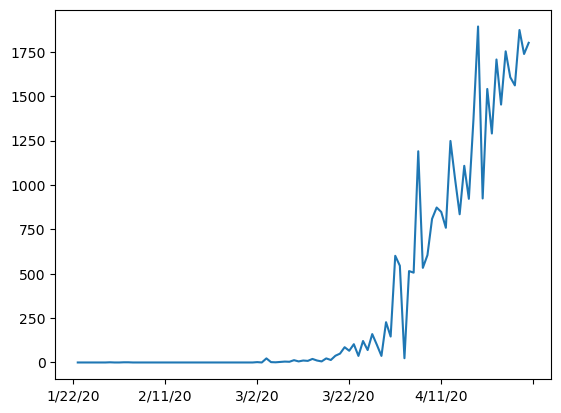

In [15]:
corona_countrywise.loc['India'].diff().plot()

In [16]:
corona_countrywise.loc['India'].diff().max()

1893.0

<AxesSubplot:>

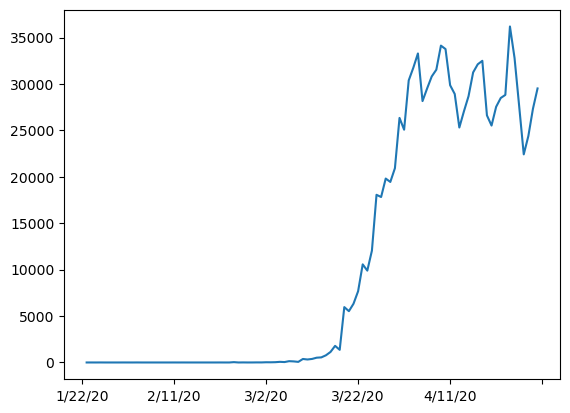

In [17]:
corona_countrywise.loc['US'].diff().plot()

In [18]:
corona_countrywise.loc['US'].diff().max()

36188.0

In [19]:
corona_countrywise.shape

(187, 100)


#### Calculated the maximum ‘Infection Rate’ for each country and stored it in a new column named ‘max_infection_rate’
##### Created a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and ‘max_infection_rate’ as a column

In [20]:
max_infection_rate = []
for i in corona_countrywise.index:
    max_infection_rate.append(corona_countrywise.loc[i].diff().max())

In [21]:
max_infection_rate

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [22]:
corona_countrywise.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)

In [23]:
corona_countrywise['max_infection_rate'] = max_infection_rate

In [24]:
corona_countrywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [25]:
corona_data = pd.DataFrame(corona_countrywise['max_infection_rate'])

In [27]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


##### Section 3: World happiness report dataset
<li>Import the Worldwide_happiness_report.csv file as happiness_report.</li>
<li>Pre-processed the DataFrame and drop 'Overall rank', 'Score', 'Generosity', 'Perceptions of corruption' columns. Set ‘Country or region’ column as Index</li>

In [28]:
happiness_report = pd.read_csv('./../dataset/Worldwide_happiness_report.csv')

In [29]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [30]:
happiness_report.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [31]:
happiness_report.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)

In [32]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [33]:
happiness_report.set_index('Country or region',inplace=True)

In [34]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [35]:
corona_data.shape

(187, 1)

In [36]:
happiness_report.shape

(156, 4)


##### Created a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and found correlation among all variables


In [37]:
data = corona_data.join(happiness_report,how='inner')

In [38]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [39]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


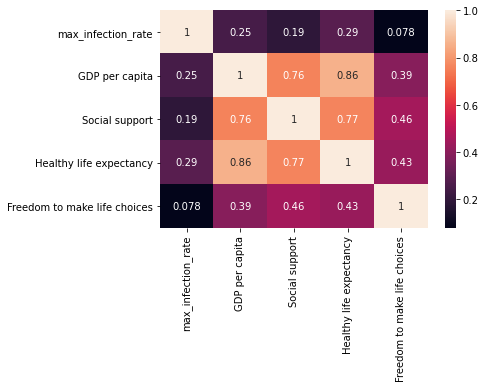

In [53]:
sns.heatmap(data.corr(),annot=True)

#### Section4: Visualizing our results using Seaborn

<li>Plotting GDP vs maximum Infection rate</li>
<li>Plotting Social support vs maximum Infection rate</li>
<li>Plotting Healthy life expectancy vs maximum Infection rate</li>
<li>Plotting Freedom to make life choices vs maximum Infection rate</li>

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

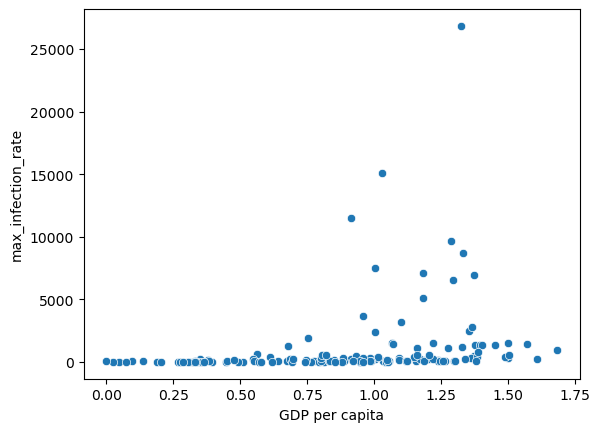

In [40]:
x = data['GDP per capita']
y = data['max_infection_rate']
sns.scatterplot(x,y)

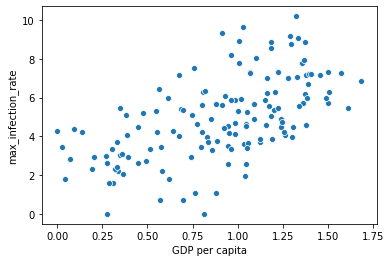

In [45]:
x = data['GDP per capita']
y = data['max_infection_rate']
sns.scatterplot(x,np.log(y))

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

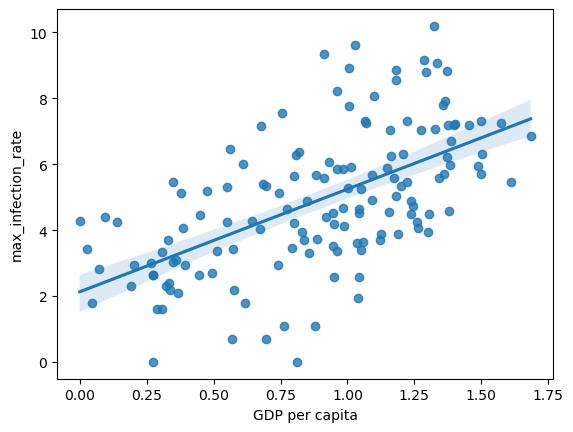

In [41]:
sns.regplot(x,np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

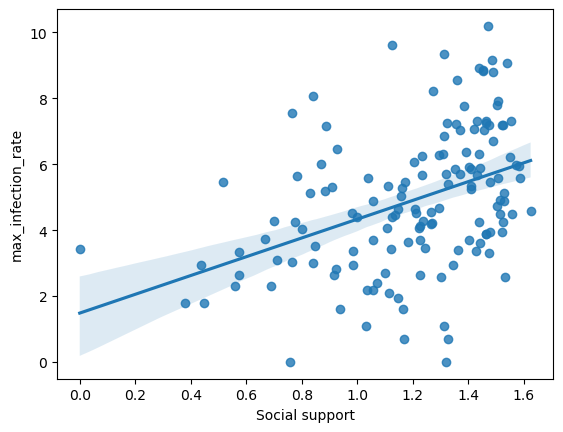

In [42]:
x = data['Social support']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

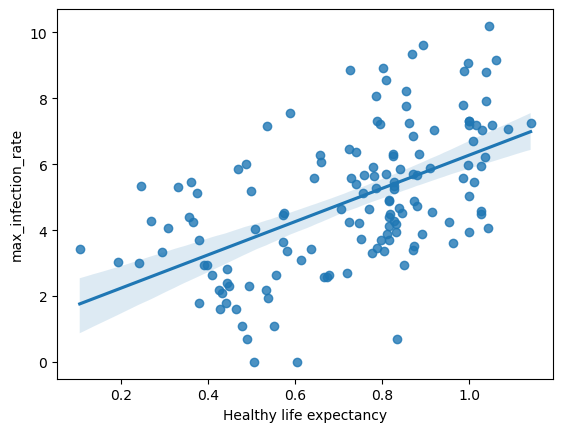

In [43]:
x = data['Healthy life expectancy']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

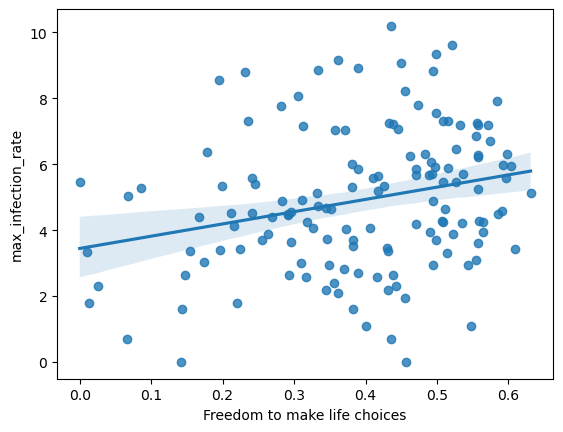

In [44]:
x = data['Freedom to make life choices']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))